In [1]:
from tensorflow import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

2023-11-05 00:50:52.870134: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-05 00:50:52.870185: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-05 00:50:52.870241: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-05 00:50:52.888356: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-05 00:50:55.023498: W tensorflow/compiler/

In [2]:
(train_images, train_labels), _ = mnist.load_data()
train_images = np.array(train_images).reshape((60000, 28*28))
train_images = train_images.astype("float32") / 255

Changing the capacity of the model is going to directly affect the validation loss when we try to overfit it to the given dataset

In [3]:
model = keras.Sequential([
    keras.layers.Dense(96, activation=keras.activations.relu),
    keras.layers.Dense(96, activation=keras.activations.relu),
    keras.layers.Dense(10, activation=keras.activations.softmax)
])

2023-11-05 00:50:59.971645: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [5]:
history_small_model = model.fit(
    train_images, 
    train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2
)

Epoch 1/20
375/375 [==============================] - 4s 6ms/step - loss: 0.3842 - accuracy: 0.8918 - val_loss: 0.1866 - val_accuracy: 0.9443
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1615 - accuracy: 0.9522 - val_loss: 0.1385 - val_accuracy: 0.9592
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1130 - accuracy: 0.9666 - val_loss: 0.1259 - val_accuracy: 0.9629
Epoch 4/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0870 - accuracy: 0.9746 - val_loss: 0.1055 - val_accuracy: 0.9682
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.0679 - accuracy: 0.9798 - val_loss: 0.0967 - val_accuracy: 0.9714
Epoch 6/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0537 - accuracy: 0.9843 - val_loss: 0.0953 - val_accuracy: 0.9711
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0452 - accuracy: 0.9868 - val_loss: 0.0976 - val_accuracy: 0.9722
Epoch 

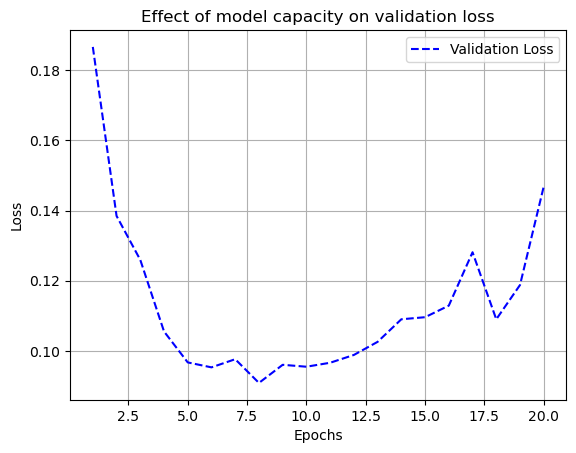

In [6]:
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--", label="Validation Loss")
plt.title("Effect of model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()